In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [129]:
from soccerplots import radar_chart

In [6]:
players_df = pd.read_csv('../data/players_csv', index_col=0)

In [18]:
players_df.iloc[18:, :]

,name,number,position,ssiId,optaId,optaUuid,opponent
18,A. Danladi,7,SUB,0811e82b-9274-4a21-8071-83647b4c4bc9,202195,1wfz5avhq6h41axvxggwa6vvt,away
19,A. Godoy,20,LDM,16d1cf1a-1f2c-4802-9616-ce52e351b4dd,99117,4ajhe29nxseyo6wqg3hjdghcl,away
20,J. Willis,1,GK,1fef9c19-5e91-4e30-a0f5-a92eeca0b927,95309,241n038j8171d06j7y97ug4id,away
21,E. Miller,15,RB,2651db82-f449-4232-bdf6-154798e0e325,164480,dnm3m8nto9bof5syhtb6w8es5,away
22,D. Romney,4,LCB,2d4e6f77-b4c2-4a77-a903-9fa4b8bff949,213213,49hih9ka1cljgkihamec6b17t,away
23,J. Medranda,94,SUB,2daf7704-2d64-47a0-b704-14a246f30025,169013,61rlxmejof8zjv8uw3sk1l045,away
24,W. Zimmerman,25,RCB,5998bc4a-77ec-49cc-8736-184bd70d9d6d,151933,eooivgc2bc7bdbl1gq784ehn9,away
25,D. Accam,11,RW,878b4d25-8eee-4bb6-9200-32f2f6903ac6,126174,1hl59djjogr15wtdp8xvages5,away
26,D. Badji,9,ST,94c557db-0e5a-422f-ba6a-3ce97322b9f6,202376,dhwk7axf00z4pe7crgp3ge8yx,away
27,B. Beckeles,55,SUB,a5eba55b-b6ac-471b-9220-4125a541d7f8,99336,akvnlaszzemsj14oa62n39c5x,away


In [8]:
marking_df = pd.read_csv('../data/passing_pos.csv', index_col=0)

In [22]:
top_passers = marking_df[marking_df['attTeamId'] == 15154.0].groupby('playerId').count().sort_values('id', ascending=False).iloc[:2, 0].index

## Want to dig into McCarty and Godoy, they accounted for many more passes than the rest of their teammates!

* 78 for Godoy
* 100 for McCarty


In [30]:
marking_df[(marking_df['attTeamId'] == 15154.0) & marking_df['playerId'].isin(top_passers)]

,id,optaId,gameId,period,sequenceIdx,markingType,gameClock,wallClock,frameIdx,attTeamId,defTeamId,playerId,passerDefId,passerDefDist,receiverId,vel,air,breaksOffsideLine,passLoc,direction,defBehindPasser,defBehindReceiver,attAheadPasser,attAheadReceiver,defBypassed,passDifficulty,defInBox,attInBox,passerVel,events,startClock,endClock,startWallClock,endWallClock,startFrameIdx,endFrameIdx,teamId,isContested,startType,teamXg,verticalPassing,verticalCarrying,receptionLoc,receptionVel,startLoc,endLoc,distance,shooterId,shotLoc,goalDist,shooterDefDist,shooterDefId,defGoalside,xG,gkDist,gkVel,gkLoc,takerId,attInGkBox,defInGkBox,shortOption,nearPostDefender,farPostDefender,crossSwing,passOutcome
19,64d8d97c-5fd6-404a-b386-9b5743710f04,2.190066e+09,2044262,1,0,pass,48.64,1.583709e+12,1216.0,15154.0,1581.0,41626.0,179298.0,3.21,213665.0,"[11.44, -150.88]",True,False,"[15.86, 8.79, 0.0]",forward,8.0,6.0,4.0,3.0,2.0,0.2999,1.0,0.0,"[2.16, -96.94]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
23,de7185e5-4061-4965-9fd1-f943744c1da6,2.190066e+09,2044262,1,0,pass,52.08,1.583709e+12,1302.0,15154.0,1581.0,41626.0,96622.0,4.49,148712.0,"[7.61, -145.18]",False,True,"[18.94, 11.85, 0.0]",forward,7.0,6.0,2.0,3.0,1.0,0.3910,1.0,0.0,"[2.17, 12.81]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
38,c180a889-9254-48ea-ac80-64117d20cc01,2.190066e+09,2044262,1,0,pass,80.08,1.583709e+12,2002.0,15154.0,1581.0,99117.0,55817.0,3.12,151933.0,"[7.88, 4.57]",False,False,"[-5.51, -2.64, 0.0]",backward,8.0,11.0,5.0,8.0,-3.0,0.9699,1.0,0.0,"[3.57, -140.1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
54,69154850-7012-4118-a575-a276b1086b6a,2.190066e+09,2044262,1,0,pass,162.68,1.583709e+12,4067.0,15154.0,1581.0,41626.0,55817.0,7.58,99117.0,"[9.56, -66.0]",False,False,"[0.52, -61.32, 0.0]",backward,10.0,11.0,5.0,5.0,-1.0,0.9741,1.0,0.0,"[0.76, -11.75]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
56,dc5a14a1-81a7-4911-90d1-93cf365b6b3b,2.190066e+09,2044262,1,0,pass,165.64,1.583709e+12,4141.0,15154.0,1581.0,99117.0,NaN,12.49,213213.0,"[16.3, -83.57]",False,False,"[-5.8, -42.38, 0.0]",square,11.0,11.0,5.0,6.0,0.0,0.9871,1.0,0.0,"[3.24, 99.48]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,379c2a5e-39e1-40d7-bd77-90d142306c3c,2.190081e+09,2044262,2,0,pass,2667.68,1.583715e+12,66692.0,15154.0,1581.0,41626.0,96622.0,4.67,169013.0,"[9.45, -114.8]",True,False,"[6.45, 4.11, 0.0]",forward,7.0,7.0,4.0,5.0,0.0,0.8182,1.0,0.0,"[1.04, 31.22]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
2134,741b2736-6128-4b41-8089-7ffc84a8e780,2.190081e+09,2044262,2,0,pass,2673.80,1.583715e+12,66845.0,15154.0,1581.0,41626.0,235290.0,1.46,213665.0,"[11.59, 104.76]",False,False,"[14.42, -4.54, 0.0]",square,9.0,6.0,3.0,4.0,3.0,0.9852,1.0,0.0,"[2.81, -88.65]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
2142,e2443339-6002-4429-90bb-4c7809fb0776,2.190081e+09,2044262,2,0,pass,2721.32,1.583715e+12,68033.0,15154.0,1581.0,99117.0,235290.0,0.66,NaN,"[1.11, -104.46]",True,False,"[-6.34, 13.61, 0.0]",square,9.0,9.0,6

In [35]:
marking_df[(marking_df['attTeamId'] == 15154.0) & marking_df['playerId'].isin(top_passers)].groupby(['air', 'playerId']).count()

id  optaId  gameId  period  sequenceIdx  markingType  \
air   playerId                                                         
False 41626.0   76      76      76      76           76           76   
      99117.0   67      67      67      67           67           67   
True  41626.0   24      24      24      24           24           24   
      99117.0   11      11      11      11           11           11   

                gameClock  wallClock  frameIdx  attTeamId  defTeamId  \
air   playerId                                                         
False 41626.0          76         76        76         76         76   
      99117.0          67         67        67         67         67   
True  41626.0          24         24        24         24         24   
      99117.0          11         11        11         11         11   

                passerDefId  passerDefDist  receiverId  vel  \
air   playerId                                                
False 41626.0            72             76          72   76   
      99117.0            63             67          66   67   
True  41626.0            24             24          22   24   
      99117.0            10             11           8   11   

                breaksOffsideLine  passLoc  direction  defBehindPasser  \
air   playerId                                                           
False 41626.0                  76       76         76               76   
      99117.0                  67       67         67               67   
True  41626.0                  24       24         24               24   
      99117.0                  11       11         11               11   

                defBehindReceiver  attAheadPasser  attAheadReceiver  \
air   playerId                                                        
False 41626.0                  76              76                76   
      99117.0                  67              67                67   
True  41626.0                  24              24                24   
      99117.0                  11              11                11   

                defBypassed  passDifficulty  defInBox  attInBox  passerVel  \
air   playerId                                                               
False 41626.0            76              76        76        76         76   
      99117.0            67              67        67        67         67   
True  41626.0            24              24        24        24         24   
      99117.0            11              11        11        11         11   

                events  startClock  endClock  startWallClock  endWallClock  \
air   playerId                                                               
False 41626.0        0           0         0               0             0   
      99117.0        0           0         0               0             0   
True  41626.0        0           0         0               0             0   
      99117.0        0           0         0               0             0   

                startFrameIdx  endFrameIdx  teamId  isContested  startType  \
air   playerId                                                               
False 41626.0               0            0       0            0          0   
      99117.0               0            0       0            0          0   
True  41626.0               0            0       0            0          0   
      99117.0               0            0       0            0          0   

                teamXg  verticalPassing  verticalCarrying  receptionLoc  \
air   playerId                                                            
False 41626.0        0                0                 0             0   
      99117.0        0                0                 0             0   
True  41626.0        0                0                 0             0   
      99117.0        0                0                 0             0   

                receptionVel  startLoc  e

In [98]:
#ordering by mccarty and then Godoy

incomplete = np.array([[3, 1]])
successful = np.array([[94, 74]])
turnover = np.array([[3, 3]])

incomplete_pct = incomplete / np.sum(np.concatenate((incomplete, successful, turnover), axis=0), axis=0)
success_pct = successful / np.sum(np.concatenate((incomplete, successful, turnover), axis=0), axis=0)
turnover_pct = turnover / np.sum(np.concatenate((incomplete, successful, turnover), axis=0), axis=0)

In [100]:
success_pct

array([[0.94      , 0.94871795]])

In [105]:
forward = np.array([[56, 30]])
backward = np.array([[16, 21]])
diagonal = np.array([[8, 8]])
square = np.array([[20, 19]])

forward_pct = forward / np.sum(np.concatenate((forward, backward, diagonal, square), axis=0), axis=0)
backward_pct = backward / np.sum(np.concatenate((forward, backward, diagonal, square), axis=0), axis=0)
dia_pct = diagonal / np.sum(np.concatenate((forward, backward, diagonal, square), axis=0), axis=0)
square_pct = square / np.sum(np.concatenate((forward, backward, diagonal, square), axis=0), axis=0)

In [102]:
breaksline_no = np.array([[88, 73]])
breaksline_yes = np.array([[12, 5]])

breaksline_pct = breaksline_yes / np.sum(np.concatenate((breaksline_yes, breaksline_no), axis=0), axis=0)

In [103]:
air_no = np.array([[76, 67]])
air_yes = np.array([[24, 11]])

air_pct = air_yes / np.sum(np.concatenate((air_no, air_yes), axis=0), axis=0)

In [44]:
bypassed_defmean = np.array([1.1, 0.82])

In [169]:
dic = {'incomplete': incomplete_pct, 'success': success_pct, 'turnover': turnover_pct, 'forward':forward_pct, 'backward': backward_pct, 
       'diagonal': dia_pct, 'square':square_pct, 'breaks back line':breaksline_pct, 'air': air_pct}

In [170]:
new_d = {}
for key, val in dic.items():
    new_d[key] = val.reshape(2, )

In [171]:
new_d

{'incomplete': array([0.03      , 0.01282051]),
 'success': array([0.94      , 0.94871795]),
 'turnover': array([0.03      , 0.03846154]),
 'forward': array([0.56      , 0.38461538]),
 'backward': array([0.16      , 0.26923077]),
 'diagonal': array([0.08     , 0.1025641]),
 'square': array([0.2       , 0.24358974]),
 'breaks back line': array([0.12      , 0.06410256]),
 'air': array([0.24      , 0.14102564])}

In [172]:
df = pd.DataFrame(new_d).T

In [173]:
df.columns = ['mccarty', 'godoy']

In [174]:
df

,mccarty,godoy
incomplete,0.03,0.012821
success,0.94,0.948718
turnover,0.03,0.038462
forward,0.56,0.384615
backward,0.16,0.269231
diagonal,0.08,0.102564
square,0.20,0.243590
breaks back line,0.12,0.064103
air,0.24,0.141026


In [175]:
params = df.index

In [176]:
ranges = [(0, 0.035), (0.9, 0.96), (0.028, 0.04), (0.35, 0.58), (0.14, 0.29), (0.05, 0.12), (0.18, 0.26), (0.04, 0.14), (0.1, 0.28)]

In [177]:
values = df.values

In [178]:
values.T

array([[0.03      , 0.94      , 0.03      , 0.56      , 0.16      ,
        0.08      , 0.2       , 0.12      , 0.24      ],
       [0.01282051, 0.94871795, 0.03846154, 0.38461538, 0.26923077,
        0.1025641 , 0.24358974, 0.06410256, 0.14102564]])

In [179]:
title = dict(title_name='McCarty',
            title_color='#B6282F',
            subtitle_name='RDM',
            title_name_2='Godoy',
            title_color_2='#344D94',
            subtitle_name_2='LDM',
            title_fontsize=18,
            subtitle_fontsize=15)

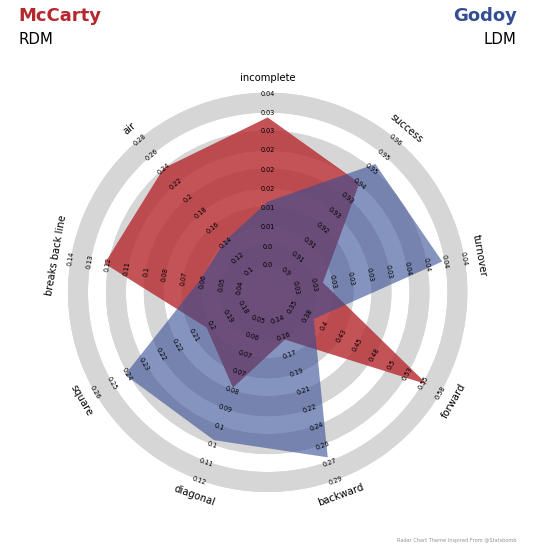

In [180]:

fig, ax = radar_chart.plot_radar(ranges=ranges, params=params, values=values.T, alpha=[0.8, 0.6], compare=True, radar_color=['#B6282F', '#344D94'], title=title, credit_size=5, dpi=300)
plt.savefig('../Visuals/sb_raderplot.png', dpi=100)

This is really innovative because we can compare two players together, I think that we can understand our own players styles of play well already, but we can absolutely use this sort of data as scouting reports to analyze other teams

* We can see that one player plays the majority of their passes forward, creating a lineup for an upcoming game to place players in areas that defend well against the opponents tendencies can have a large effect on defending performance

Id like to create a function that can do this automatically by grouping by 